# Notes - race and ethnicity


In [38]:
import duckdb
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from graphviz import Digraph
from sympy.physics.units import magnetic_density
from variables import Variables as vars

plt.style.use("../../notebook.mplstyle")

os.makedirs("./output", exist_ok=True)

In [39]:
con = duckdb.connect("./data/us_births.db", read_only=True)

In [40]:
race_df = (
    con.execute(
        """
    SELECT
        year,
        COUNT(*) as total,
        COUNT(mrace_c),
        COUNT(mrace),
        COUNT(mracerec),
        COUNT(mraceimp),
        COUNT(mbrace),
        COUNT(mrace31),
        COUNT(mrace6),
        COUNT(mrace15),
        COUNT(umhisp),
        COUNT(mhispx),
        COUNT(mhisp_r),
        COUNT(mracehisp),
        COUNT(orracem)
    FROM
        us_births
    WHERE
        year >= 1989
    GROUP BY year
    ORDER BY year
    """
    )
    .df()
    .set_index("year")
)

race_df.to_csv(
    f"./output/race_counts_by_year_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
)
race_df

,total,count(mrace_c),count(mrace),count(mracerec),count(mraceimp),count(mbrace),count(mrace31),count(mrace6),count(mrace15),count(umhisp),count(mhispx),count(mhisp_r),count(mracehisp),count(orracem)
year,,,,,,,,,,,,,,
1989,4045693,4045693,4045693,0,14781,0,0,0,0,0,0,0,0,4045693
1990,4162917,4162917,4162917,0,12625,0,0,0,0,0,0,0,0,4162917
1991,4115342,4115342,4115342,0,12884,0,0,0,0,0,0,0,0,4115342
1992,4069428,4069428,4069428,0,16171,0,0,0,0,0,0,0,0,4069428
1993,4004523,4004523,4004523,0,17761,0,0,0,0,0,0,0,0,4004523
1994,3956925,3956925,3956925,0,21723,0,0,0,0,0,0,0,0,3956925
1995,3903012,3903012,3903012,0,23469,0,0,0,0,0,0,0,0,3903012
1996,3894874,3894874,3894874,0,27455,0,0,0,0,0,0,0,0,3894874
1997,3884329,3884329,3884329,0,27927,0,0,0,0,0,0,0,0,3884329


In [41]:
mrace_c_counts_df = (
    con.execute(
        """
        SELECT *
        FROM(
            SELECT year, mrace_c
            FROM us_births
            WHERE down_ind = 1
        )
        PIVOT(
            COUNT(*)
            FOR mrace_c IN(1, 2, 3, 4)
        )
        ORDER BY year;
        """
    )
    .df()
    .dropna()
    .set_index(vars.YEAR)
)

mrace_c_counts_df.to_csv(
    f"./output/mrace_c_counts_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
)
mrace_c_counts_df

,1,2,3,4
year,,,,
1989,1693,200,16,45
1990,1661,249,20,53
1991,1579,151,15,46
1992,1572,167,29,48
1993,1533,161,22,47
1994,1496,141,21,48
1995,1450,134,17,39
1996,1468,155,9,45
1997,1450,150,11,52


In [42]:
mrace_c_counts_ds_df = (
    con.execute(
        """
        SELECT *
        FROM(
            SELECT year, mrace_c
            FROM us_births
            WHERE down_ind = 1
        )
        PIVOT(
            COUNT(*)
            FOR mrace_c IN(1, 2, 3, 4)
        )
        ORDER BY year;
        """
    )
    .df()
    .dropna()
    .set_index(vars.YEAR)
)

mrace_c_counts_ds_df.to_csv(
    f"./output/mrace_c_counts_ds_{pd.Timestamp.now().strftime('%Y%m%d_%H%M%S')}.csv"
)
mrace_c_counts_ds_df

,1,2,3,4
year,,,,
1989,1693,200,16,45
1990,1661,249,20,53
1991,1579,151,15,46
1992,1572,167,29,48
1993,1533,161,22,47
1994,1496,141,21,48
1995,1450,134,17,39
1996,1468,155,9,45
1997,1450,150,11,52


In [43]:
mrace_c_totals_df = (
    con.execute(
        """
        SELECT 
        mrace_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        GROUP BY mrace_c;
        """
    )
    .df()
    .dropna()
)
mrace_c_totals_df["mrace_c"] = mrace_c_totals_df["mrace_c"].map(
    {1: "White", 2: "Black", 3: "AI/AN", 4: "Asian/PI"}
)
mrace_c_totals_df

,mrace_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,White,0.000623,0.001823,0.001214
2,Black,0.000393,0.001592,0.001216
3,AI/AN,0.000695,0.001444,0.001220
4,Asian/PI,0.000393,0.002506,0.001237


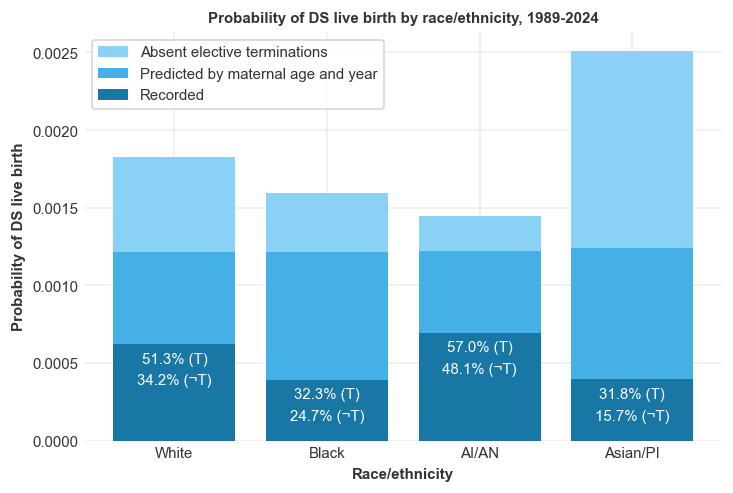

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 1989-2024")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    mrace_c_totals_df["mrace_c"],
    mrace_c_totals_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
for i, row in mrace_c_totals_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

In [45]:
mrace_c_totals_2004_df = (
    con.execute(
        """
        SELECT 
        mrace_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        WHERE year >= 2004
        GROUP BY mrace_c;
        """
    )
    .df()
    .dropna()
)
mrace_c_totals_2004_df["mrace_c"] = mrace_c_totals_2004_df["mrace_c"].map(
    {1: "White", 2: "Black", 3: "AI/AN", 4: "Asian/PI"}
)
mrace_c_totals_2004_df

,mrace_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,White,0.000674,0.001980,0.001284
2,Black,0.000469,0.001781,0.001285
3,AI/AN,0.000810,0.001527,0.001283
4,Asian/PI,0.000414,0.002720,0.001287


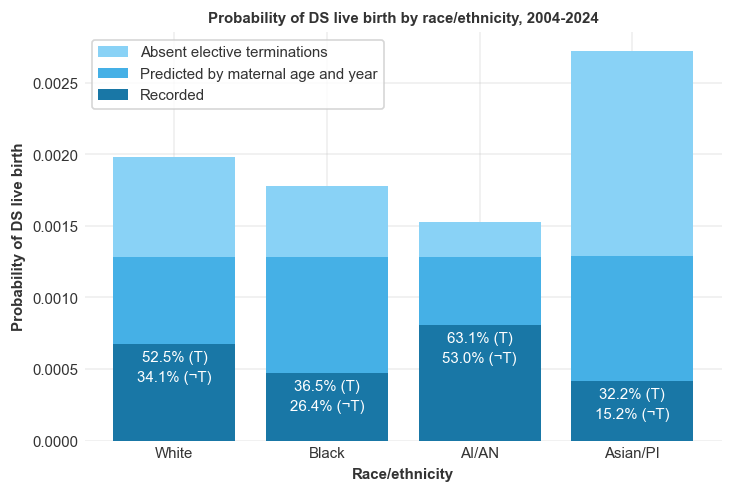

In [ ]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 2004-2024")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_2004_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
for i, row in mrace_c_totals_2004_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

In [47]:
mrace_c_totals_1989_df = (
    con.execute(
        """
        SELECT 
        mrace_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        WHERE year < 2004
        GROUP BY mrace_c;
        """
    )
    .df()
    .dropna()
)
mrace_c_totals_1989_df["mrace_c"] = mrace_c_totals_1989_df["mrace_c"].map(
    {1: "White", 2: "Black", 3: "AI/AN", 4: "Asian/PI"}
)
mrace_c_totals_1989_df

,mrace_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
0,White,0.000561,0.001616,0.001123
1,Black,0.000296,0.001329,0.001121
2,AI/AN,0.000532,0.001318,0.001125
3,Asian/PI,0.000350,0.002052,0.001130


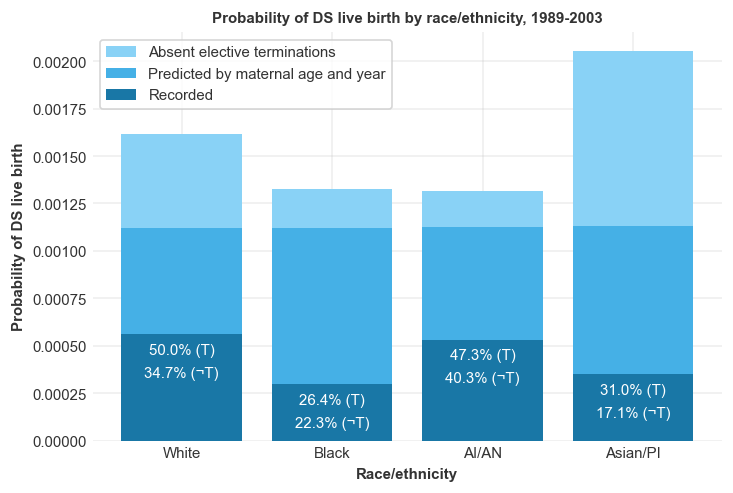

In [56]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 1989-2003")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_1989_df.iterrows():
    plt.text(
        i,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
for i, row in mrace_c_totals_1989_df.iterrows():
    plt.text(
        i,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

C:\Users\FrankBuckley\AppData\Local\Temp\ipykernel_33152\749226986.py:105: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 1, 0.9])


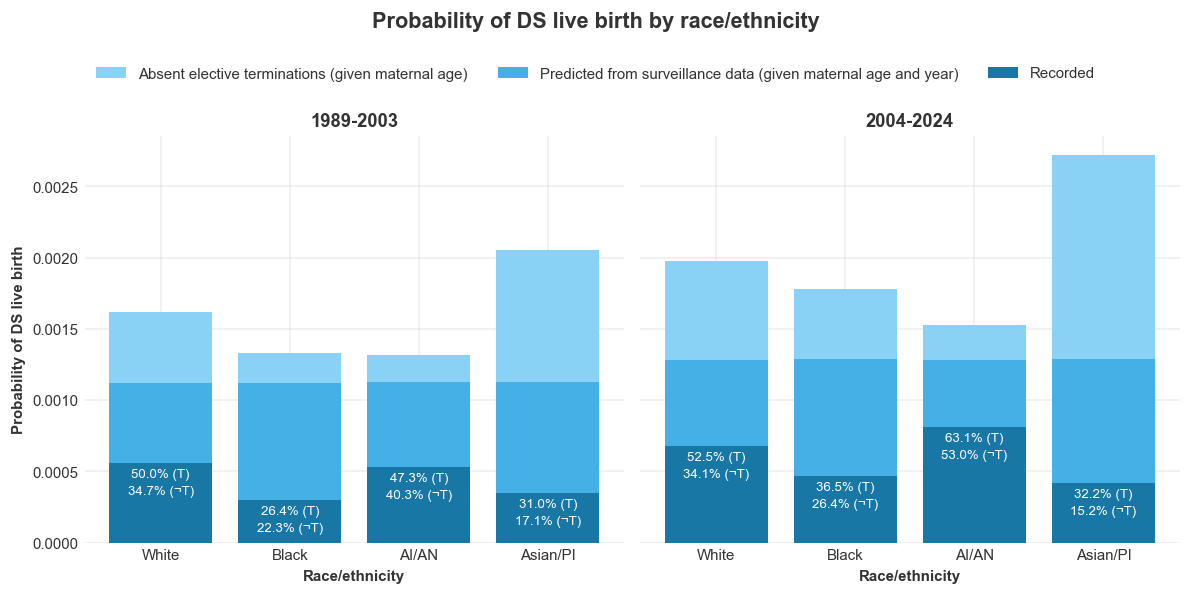

In [64]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

fig.suptitle(
    "Probability of DS live birth by race/ethnicity",
    fontsize=13,
    fontweight="bold",
    y=0.98,
)

ax = axs[0]
ax.set_title("1989-2003", fontsize=11)
ax.set_xlabel("Race/ethnicity")
ax.set_ylabel("Probability of DS live birth")

bars1 = ax.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations (given maternal age)",
)
bars2 = ax.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted from surveillance data (given maternal age and year)",
)
bars3 = ax.bar(
    mrace_c_totals_1989_df["mrace_c"],
    mrace_c_totals_1989_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in mrace_c_totals_1989_df.iterrows():
    ax.text(
        i,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )
for i, row in mrace_c_totals_1989_df.iterrows():
    ax.text(
        i,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )

ax = axs[1]
ax.set_title("2004-2024", fontsize=11)
ax.set_xlabel("Race/ethnicity")

ax.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
)
ax.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
)
ax.bar(
    mrace_c_totals_2004_df["mrace_c"],
    mrace_c_totals_2004_df["avg(down_ind)"],
    color="#1977a6",
)
for i, row in mrace_c_totals_2004_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )
for i, row in mrace_c_totals_2004_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.91),
    ncol=3,
    frameon=False,
    fontsize=9,
)

fig.tight_layout(rect=[0, 0, 1, 0.9])

In [58]:
race_hisp_totals_df = (
    con.execute(
        """
        SELECT 
        mracehisp_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        GROUP BY mracehisp_c;
        """
    )
    .df()
    .dropna()
)

race_hisp_totals_df["mracehisp_c"] = race_hisp_totals_df["mracehisp_c"].map(
    {1: "NH White", 2: "NH Black", 3: "NH AI/AN", 4: "NH Asian/PI", 5: "Hispanic"}
)
race_hisp_totals_df

,mracehisp_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,NH White,0.000643,0.001873,0.001210
2,NH Black,0.000381,0.001581,0.001214
3,NH AI/AN,0.000693,0.001422,0.001215
4,NH Asian/PI,0.000382,0.002520,0.001236
5,Hispanic,0.000567,0.001675,0.001231


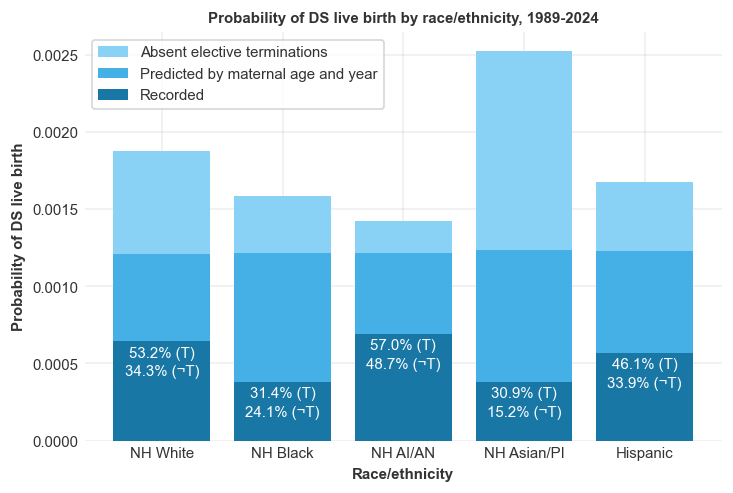

In [65]:
plt.figure(figsize=(6, 4))
plt.title("Probability of DS live birth by race/ethnicity, 1989-2024")
plt.xlabel("Race/ethnicity")
plt.ylabel("Probability of DS live birth")
plt.bar(
    race_hisp_totals_df["mracehisp_c"],
    race_hisp_totals_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations",
)
plt.bar(
    race_hisp_totals_df["mracehisp_c"],
    race_hisp_totals_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted by maternal age and year",
)
plt.bar(
    race_hisp_totals_df["mracehisp_c"],
    race_hisp_totals_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in race_hisp_totals_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
    )
for i, row in race_hisp_totals_df.iterrows():
    plt.text(
        i - 1,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
    )
plt.legend()

In [60]:
race_hisp_1989_totals_df = (
    con.execute(
        """
        SELECT 
        mracehisp_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        WHERE year < 2004
        GROUP BY mracehisp_c;
        """
    )
    .df()
    .dropna()
)

race_hisp_1989_totals_df["mracehisp_c"] = race_hisp_1989_totals_df["mracehisp_c"].map(
    {1: "NH White", 2: "NH Black", 3: "NH AI/AN", 4: "NH Asian/PI", 5: "Hispanic"}
)
race_hisp_1989_totals_df

,mracehisp_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,NH White,0.000589,0.001683,0.001121
2,NH Black,0.000293,0.001326,0.001121
3,NH AI/AN,0.000526,0.001320,0.001125
4,NH Asian/PI,0.000342,0.002067,0.001131
5,Hispanic,0.000455,0.001379,0.001130


In [61]:
race_hisp_2004_totals_df = (
    con.execute(
        """
        SELECT 
        mracehisp_c,
        AVG(down_ind),
        AVG(p_ds_lb_nt),
        AVG(p_ds_lb_wt)
        FROM us_births
        WHERE year >= 2004
        GROUP BY mracehisp_c;
        """
    )
    .df()
    .dropna()
)

race_hisp_2004_totals_df["mracehisp_c"] = race_hisp_2004_totals_df["mracehisp_c"].map(
    {1: "NH White", 2: "NH Black", 3: "NH AI/AN", 4: "NH Asian/PI", 5: "Hispanic"}
)
race_hisp_2004_totals_df

,mracehisp_c,avg(down_ind),avg(p_ds_lb_nt),avg(p_ds_lb_wt)
1,NH White,0.000693,0.002030,0.001284
2,NH Black,0.000456,0.001776,0.001285
3,NH AI/AN,0.000830,0.001496,0.001281
4,NH Asian/PI,0.000402,0.002739,0.001287
5,Hispanic,0.000629,0.001835,0.001285


C:\Users\FrankBuckley\AppData\Local\Temp\ipykernel_33152\33171914.py:105: UserWarning: The figure layout has changed to tight
  fig.tight_layout(rect=[0, 0, 1, 0.9])


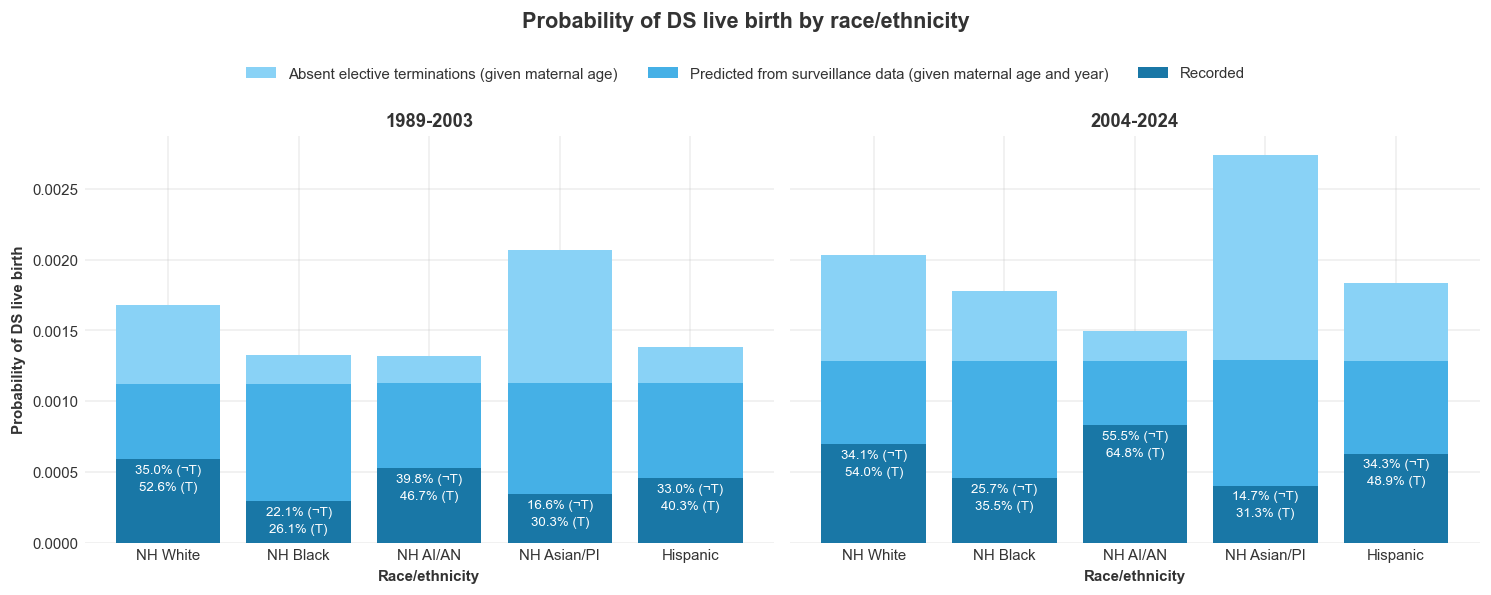

In [66]:
fig, axs = plt.subplots(1, 2, figsize=(12.5, 5), sharey=True)

fig.suptitle(
    "Probability of DS live birth by race/ethnicity",
    fontsize=13,
    fontweight="bold",
    y=0.98,
)

ax = axs[0]
ax.set_title("1989-2003", fontsize=11)
ax.set_xlabel("Race/ethnicity")
ax.set_ylabel("Probability of DS live birth")

bars1 = ax.bar(
    race_hisp_1989_totals_df["mracehisp_c"],
    race_hisp_1989_totals_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
    label="Absent elective terminations (given maternal age)",
)
bars2 = ax.bar(
    race_hisp_1989_totals_df["mracehisp_c"],
    race_hisp_1989_totals_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
    label="Predicted from surveillance data (given maternal age and year)",
)
bars3 = ax.bar(
    race_hisp_1989_totals_df["mracehisp_c"],
    race_hisp_1989_totals_df["avg(down_ind)"],
    color="#1977a6",
    label="Recorded",
)
for i, row in race_hisp_1989_totals_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )
for i, row in race_hisp_1989_totals_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )

ax = axs[1]
ax.set_title("2004-2024", fontsize=11)
ax.set_xlabel("Race/ethnicity")

ax.bar(
    race_hisp_2004_totals_df["mracehisp_c"],
    race_hisp_2004_totals_df["avg(p_ds_lb_nt)"],
    color="#89d2f6",
)
ax.bar(
    race_hisp_2004_totals_df["mracehisp_c"],
    race_hisp_2004_totals_df["avg(p_ds_lb_wt)"],
    color="#45b0e6",
)
ax.bar(
    race_hisp_2004_totals_df["mracehisp_c"],
    race_hisp_2004_totals_df["avg(down_ind)"],
    color="#1977a6",
)
for i, row in race_hisp_2004_totals_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00012,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_nt)'] * 100):.1f}% (¬T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )
for i, row in race_hisp_2004_totals_df.iterrows():
    ax.text(
        i - 1,
        row["avg(down_ind)"] - 0.00024,
        f"{(row['avg(down_ind)'] / row['avg(p_ds_lb_wt)'] * 100):.1f}% (T)",
        ha="center",
        va="bottom",
        color="white",
        fontsize=8,
    )

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels,
    loc="upper center",
    bbox_to_anchor=(0.5, 0.91),
    ncol=3,
    frameon=False,
    fontsize=9,
)

fig.tight_layout(rect=[0, 0, 1, 0.9])